In [1]:
#Elaboro: Santa Fe Garcia Braulio Leonardo
#Programa que calcula los parametros del modelo autorregresivo
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.linalg
from scipy.linalg import toeplitz

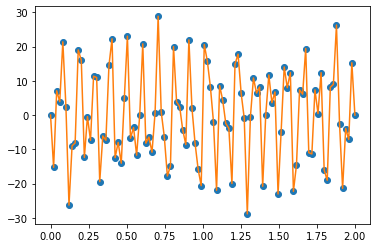

In [2]:
# Rango [a,b]

b = 5 ; a = 0; dt = 1
f1=5.
f2=6.
f3=30.
f4=40.

a1=2.5
a2=5.0
a3=10.
a4=15.

Fsen=f4
#Fsen=40
#Obteniendo la frecuencia de muestreo
fm=2*Fsen
Ts=1/fm

#por lo tanto
fd=Fsen/fm
#periodo inverso a la frecuencia de la señal digital
Td=1/fd

u = lambda t: np.piecewise(t,t>=0,[1,0])
x = lambda t: (a1*np.sin(2.*np.pi*f1*t)+a2*np.sin(f2*2.*np.pi*t)+a3*np.sin(f3*2.*np.pi*t)+a4*np.sin(f4*2.*np.pi*t)+random.randint(1))*u(t)
h = lambda t: (a1*np.sin(2.*np.pi*f1*t)+a2*np.sin(f2*2.*np.pi*t)+a3*np.sin(f3*2.*np.pi*t)+a4*np.sin(f4*2.*np.pi*t)+random.randint(1))*u(t)


ti =np.linspace(0,int(Td),100)
xi = x(ti)
hi = h(ti)
plt.plot(ti,xi,"o")
plt.plot(ti,hi)

In [3]:

# Integral de Correlacion x[t]*h[t]
def correlation (v,w):
    yi2=[]
    for j in range (1,len(w)):
        yi=[]
        for i in range (1,len(w)+1):
            p1=w[-i::]
            c1=np.zeros(len(w)-i)
            g1=np.append(p1,c1)
            yi=np.append(yi,sum(g1*v))
        p=w[:-j]
        c=np.zeros(j)
        g=np.insert(p,0,c)
        yi2=np.append(yi2,sum(g*v))

    return np.concatenate([yi,yi2]) 



In [5]:
corr=correlation(xi,hi)
#print(corr)
        


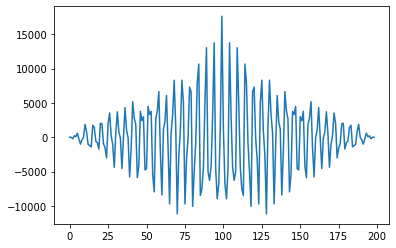

In [6]:
#Graficamos la autocorrelacio
plt.plot(corr)

In [13]:
#como es simetrica nos quedamos con la mitad para construir la matriz de autocorrelacion
corr=corr[corr.shape[0]//2 :]

## AR PARA N =6


In [14]:
#construimos los indices de la matriz
N = 6 
idx= np.arange(0,corr.shape[0]-1)
corr2=corr[idx+1]
idxc=np.arange(0,N)
indices=toeplitz(idx,idxc)

In [15]:
#evaluamos la autocorrelacion con los indices 
r=corr[indices] 

In [16]:
#calculamos los parametros 
ak=((np.linalg.inv(r.T@r)@r.T)@corr2)
#normalizamos para a0 
ak /= ak[0]
print(ak)

[ 1.         -1.19081636 -0.87438854 -1.18295182  1.09269981 -1.69106812]


In [17]:
#calculamos la varianza
var=0
for i in range (0,N):
    var=var+ak[i]*corr2[-i]
print(var)
 

1623.814706307333


In [18]:
#calculamos el PS
w=2*np.pi/Td
tFourier=0
PS=[]
for i in range (0,N):
    tFourier=tFourier+ak[i]*np.exp(-i*1j*w)
    PS.append((var**2)/((np.abs(tFourier))**2))

print(PS)

[2636774.20041997, 549365.0035682536, 1521524.109288691, 422093.3253826133, 204353.02552547303, 94468.59492244222]


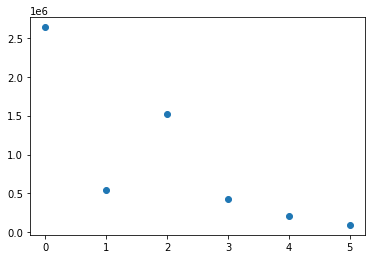

In [19]:
#Graficamos el PS
plt.plot(PS,'o')

# AR PARA N = 4

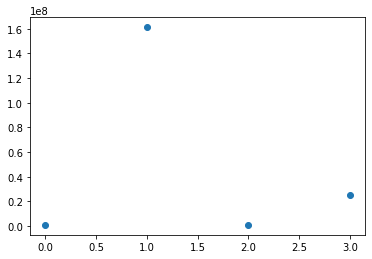

In [20]:
#construimos los indices de la matriz
N = 4 
idx= np.arange(0,corr.shape[0]-1)
corr2=corr[idx+1]
idxc=np.arange(0,N)
indices=toeplitz(idx,idxc)
r=corr[indices] 
#calculamos los parametros 
ak=((np.linalg.inv(r.T@r)@r.T)@(-corr2))
#normalizamos para a0 
ak /= ak[0]

#calculamos la varianza
var=0
for i in range (0,N):
    var=var+ak[i]*corr2[-i]

#calculamos el PS
w=2*np.pi/Td
tFourier=0
PS=[]
for i in range (0,N):
    tFourier=tFourier+ak[i]*np.exp(-i*1j*w)
    PS.append((var**2)/((np.abs(tFourier))**2))

#Graficamos el PS
plt.plot(PS,'o') 